<img width=640  src="https://matplotlib.ramazannuh.repl.co/Matplotlib-Grid-12.png"><br><br>&emsp;&emsp;Bu yazıda biz qrafikimizin arxa planına qəfəsşəkilli görünüm əlavə edərək onun <br>xoş görünməsi və bundan əlavə olaraq dalğalanmaların uzun - enli qrafiklər boyunca <br>rahatlıqla gözəyarı ölçülməsinə şərait yaradarıq.<br>

>- <b>grid()</b> : Bu metodla biz qrafikimizin arxa planına qəfəsşəkilli görünüm <br>əlavə edərik.

>- alpha : Qəfəsşəkilli görünümün xəttlərinin tündlüyünü təyin edərik. 0-1 <br>arasında qiymət alar. Dəyəri 1 ədədinə yaxınlaşdıqca saturasiya - tündlük <br>artar.0 ədədinə yaxınlaşdıqca azalar.

>- linestyle : Qəfəsşəkilli görünümün xəttlərinin necə olacağını təyin edərik:<br> '-', '--', '-.', ':', '', kimi parametrlər alır.

>- linewidth : Qəfəsşəkilli görünümün xəttlərinin qalınlığını təyin edərik. Tam<br> ədədlərdən ibarət qiymətlər alar.

>- color : Qəfəsşəkilli görünümün xəttlərinin rəngini təyin etmək üçün istifadə<br> edərik.

&emsp;&emsp;Fərqli stillər - Datasetlər üçün fərqləndirmədə istifadə edə bilərik:

>- dash_capstyle :'butt', 'round', 'projecting'

>- dash_joinstyle : 'miter', 'round', 'bevel'

>- drawstyle : 'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'

>- fillstyle : 'full', 'left', 'right', 'bottom', 'top', 'none'



&emsp;&emsp;İlk öncə kitabxanaları daxil edək:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

&emsp;&emsp;Datadan analiz üçün yox nümunələri göstərmək üçün istifadə edəcəyik deyə <br>kifayət qədər sadə olmasına və sıradan kodlar olmasına diqqət yetirəcəm. Datanı import <br>edək və xətti qrafik üzərində çalışmalarımızı göstərək:

In [7]:
data_read_file_1 = '/content/BeynəlxalqMiqrasiyaForGrid.xlsx'
data_read_1 = pd.read_excel(data_read_file_1, sheet_name='Beynəlxalq Miqrasiya \
90danəvvəl', index_col='İllər')
df_BMiq_90dan_evvel = pd.DataFrame(data=data_read_1 )

data_read_file_2 = '/content/BeynəlxalqMiqrasiyaForGrid.xlsx'
data_read_2 = pd.read_excel(data_read_file_2, sheet_name='Beynəlxalq Miqrasiya \
90 sonrası', index_col='İllər')
df_BMiq_90dan_sonra = pd.DataFrame(data=data_read_2 )


&emsp;&emsp;Burada, "<i>df_BMiq_90dan_evvel</i>" SSRi Dövlət Statistika Komitəsi Tərəfindən <br>tutulmuş qeydlərdir. Belə ki, bu məlumatlar ümumi olaraq iki sütunu əhatə edir. Ona <br>görə də Miqrasiya artımı və azalması statistik qeydlərini iki yerə ayırdım. Yuxarıda <br>dediyim kimi "Beynəlxalq Miqrasiya 90dan əvvəl" və "Beynəlxalq Miqrasiya 90dan <br>sonra". Bu datanı iki ayrı data olaraq ələ aldım. Lakin, sadəcə gridline -yə baxacağıq.
<br><mark>Qeyd:</mark> Miqrasiyanın artımı və azalması qrafiklərindəki mənfi göstəricilər əhalinin <br>mövcud bölgə - Kənd və ya şəhərdən digər istiqamətlərə axın etməsini göstərər. <br>Məsələn, kənd yerlərində 1970-ci ildə -28000 olması buradan köçün baş verdiyini <br>göstərir. Şəhər yerlərində isə 25200 olması bu köçün sənayeləşmə ilə əlaqədar olaraq <br>şəhərlərə axınını göstərir. Yekunda <i>"Miqrasiya artımı (azalması)"</i> sütunu bizə  Beynəlxalq<br> səviyyədə miqrasiya etmiş şəxslərin sayını verəcəkdir. Məsələn, 1970-ci ildə bu -2800 <br>olaraq həmin Ölkədə (Azərbaycan SSRİ) miqrasiya ilə azalan əhalinin sayını 2800 verər.

In [24]:
df_BMiq_90dan_evvel.head().style\
.set_table_styles([dict(selector="th",props=[('max-width', '80px')])])

,şəhər yerlərində,kənd yerlərində,Miqrasiya artımı (azalması)
İllər,,,
1970,25200,-28000.000000,-2800.000000
1971,16900,-18200.000000,-1300.000000
1972,16000,-14500.000000,1500.000000
1973,16700,-21100.000000,-4400.000000
1974,20000,-24600.000000,-4600.000000


In [26]:
df_BMiq_90dan_sonra.tail().style\
.set_table_styles([dict(selector="th",props=[('max-width', '80px')])])

,Ölkəyə daimi yaşamaq üçün gələnlər,Ölkədən daimi yaşamaq üçün gedənlər,şəhər yerlərində,kənd yerlərində,Miqrasiya artımı (azalması)
İllər,,,,,
2017,3100,1900,600,600,1200
2018,3200,1600,500,1100,1600
2019,2000,1600,100,300,400
2020,1700,600,200,900,1100
2021,2400,600,1600,200,1800


In [17]:
#@title
def pti (pti_X, pti_Y):
   '''
   İki ədəd pixel dəyər alar və onları 
   inç uzunluq vahidinə çevirib geri qaytarar
   '''  
   x_Res = pti_X*0.010417
   y_Res = pti_Y*0.010417
   return x_Res, y_Res
def to_annotate_inside(x_cor, y_cor):
  label = f"{y_cor}"
  return plt.annotate(label, # annotasiya etdiyimiz mətn 
                      (x_cor,y_cor), # annotasiya mətninin yerləşəcəyi mövqe 
                      #koordinatlar 
                      textcoords="offset points", # mətnin necə yerləşəcəyi 
                      xytext=(0,10), # mətnin nöqtədən uzaqlığı (x,y) 
                      ha='center') # mətnin yerləşmə qaydası  
                      #left, right və ya center ola bilər
def to_annotate(x_cor_list, y_cor_list):
  # zip x və y koordinatlarını cütləyərək birləşdirər
  for x,y in zip(x_cor_list, y_cor_list):
    to_annotate_inside(x, y)


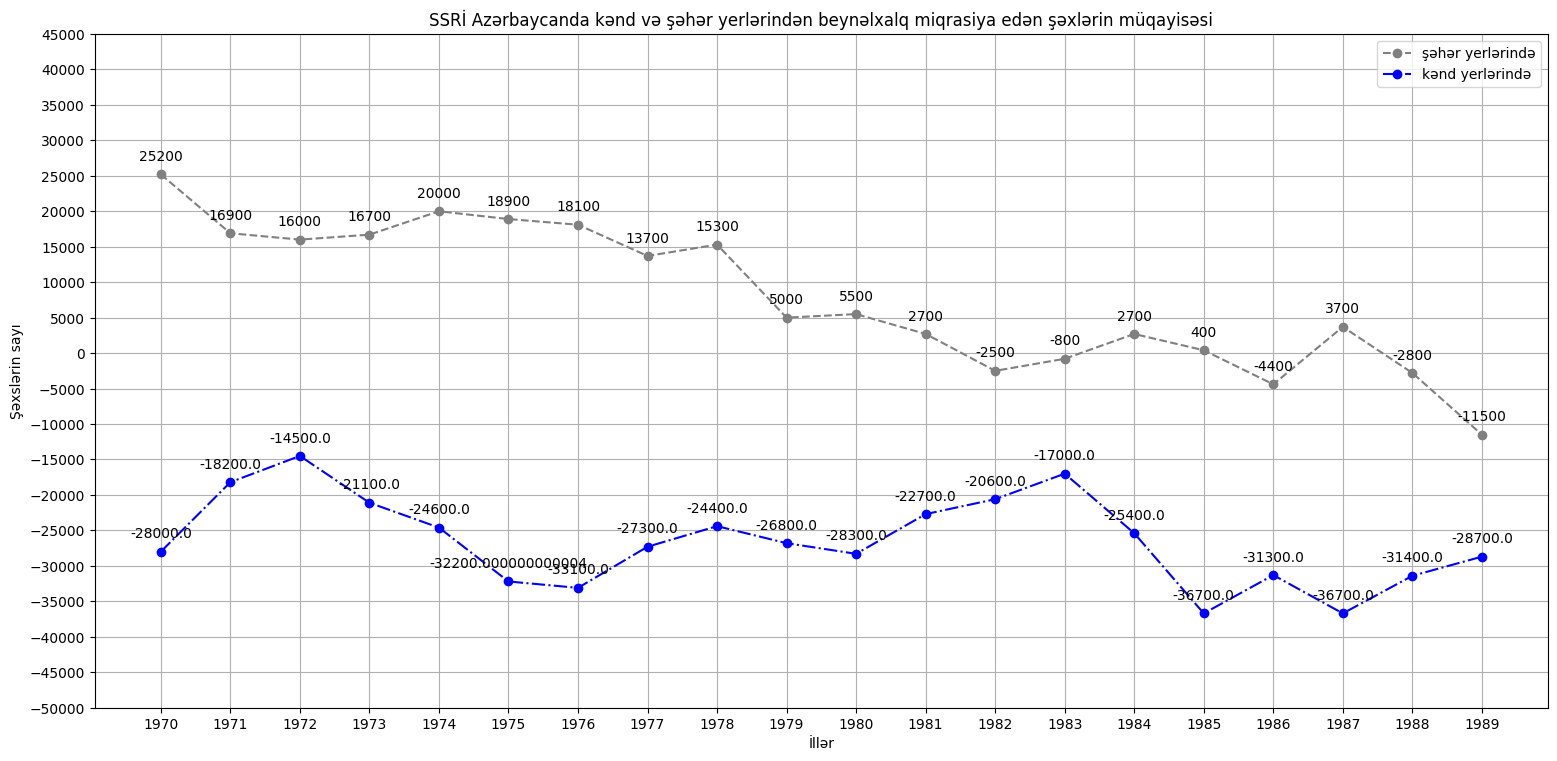

In [48]:
from pandas.core.frame import fmt
plt.figure(figsize=pti(1800,840))

plt.title(label='SSRİ Azərbaycanda kənd və şəhər yerlərindən beynəlxalq\
 miqrasiya edən şəxlərin müqayisəsi', loc='center')
plt.plot(df_BMiq_90dan_evvel.index, 'şəhər yerlərində', 
         color='grey',linestyle='--', marker='o',data=df_BMiq_90dan_evvel)
to_annotate(df_BMiq_90dan_evvel.index,df_BMiq_90dan_evvel['şəhər yerlərində'])
plt.plot(df_BMiq_90dan_evvel.index, 'kənd yerlərində',
         '-.b',marker="o",data=df_BMiq_90dan_evvel)
to_annotate(df_BMiq_90dan_evvel.index,df_BMiq_90dan_evvel['kənd yerlərində'])
plt.xlabel(xlabel='İllər', loc='center')
plt.ylabel(ylabel='Şəxslərin sayı', loc='center')
plt.xticks(range(1970,1990))
plt.yticks(range(-50000,50000,5000))
plt.legend()
plt.grid()
plt.show()


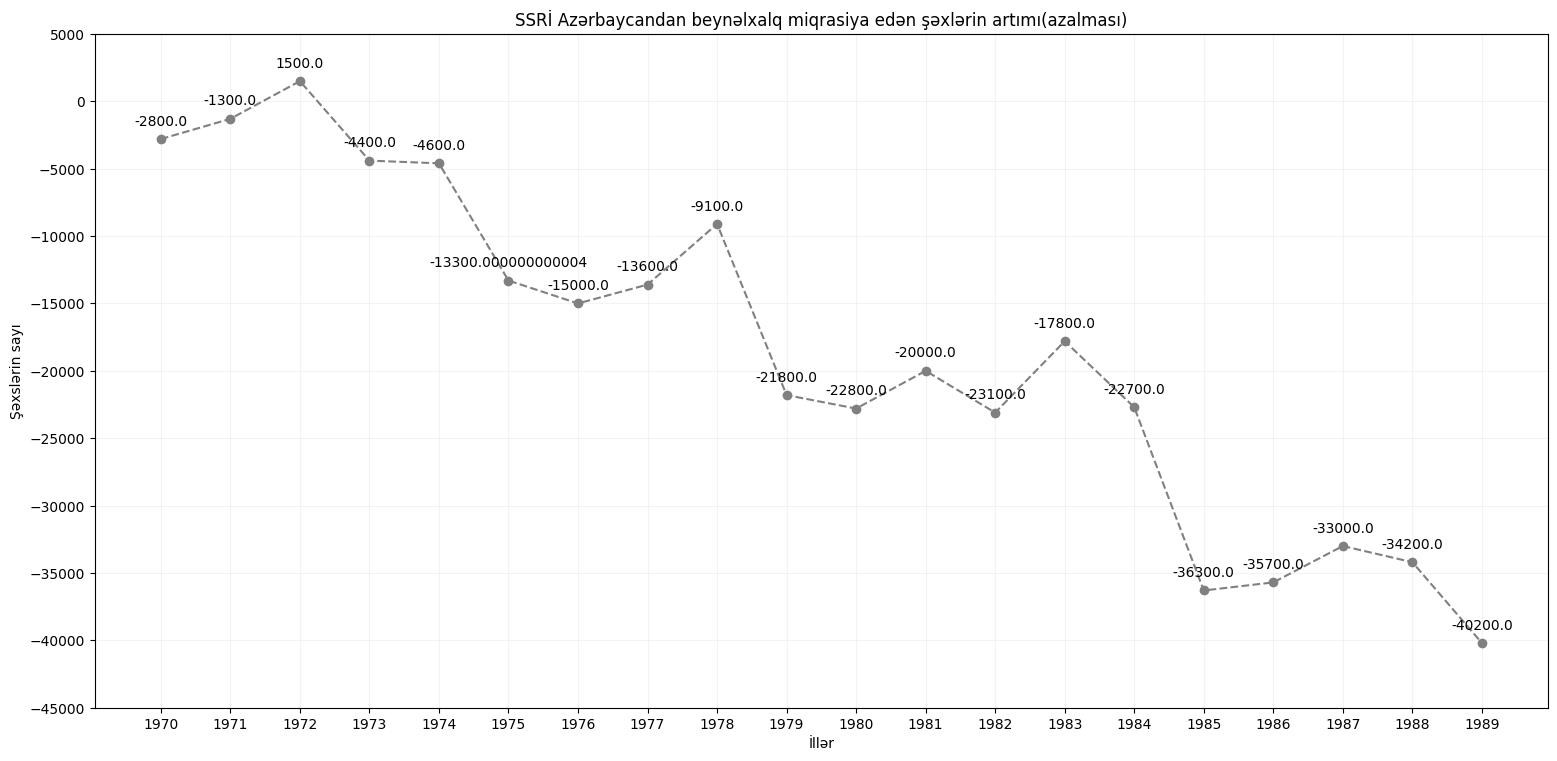

In [49]:
from pandas.core.frame import fmt
plt.figure(figsize=pti(1800,840))
plt.title(label='SSRİ Azərbaycandan beynəlxalq\
 miqrasiya edən şəxlərin artımı(azalması)', loc='center')
plt.plot(df_BMiq_90dan_evvel.index, 'Miqrasiya artımı (azalması)', 
         color='grey',linestyle='--', marker='o',data=df_BMiq_90dan_evvel)
to_annotate(df_BMiq_90dan_evvel\
            .index,df_BMiq_90dan_evvel['Miqrasiya artımı (azalması)'])
plt.xlabel(xlabel='İllər', loc='center')
plt.ylabel(ylabel='Şəxslərin sayı', loc='center')
plt.xticks(range(1970,1990))
plt.yticks(range(-45000,10000,5000))
plt.grid(alpha=0.15)
plt.show()


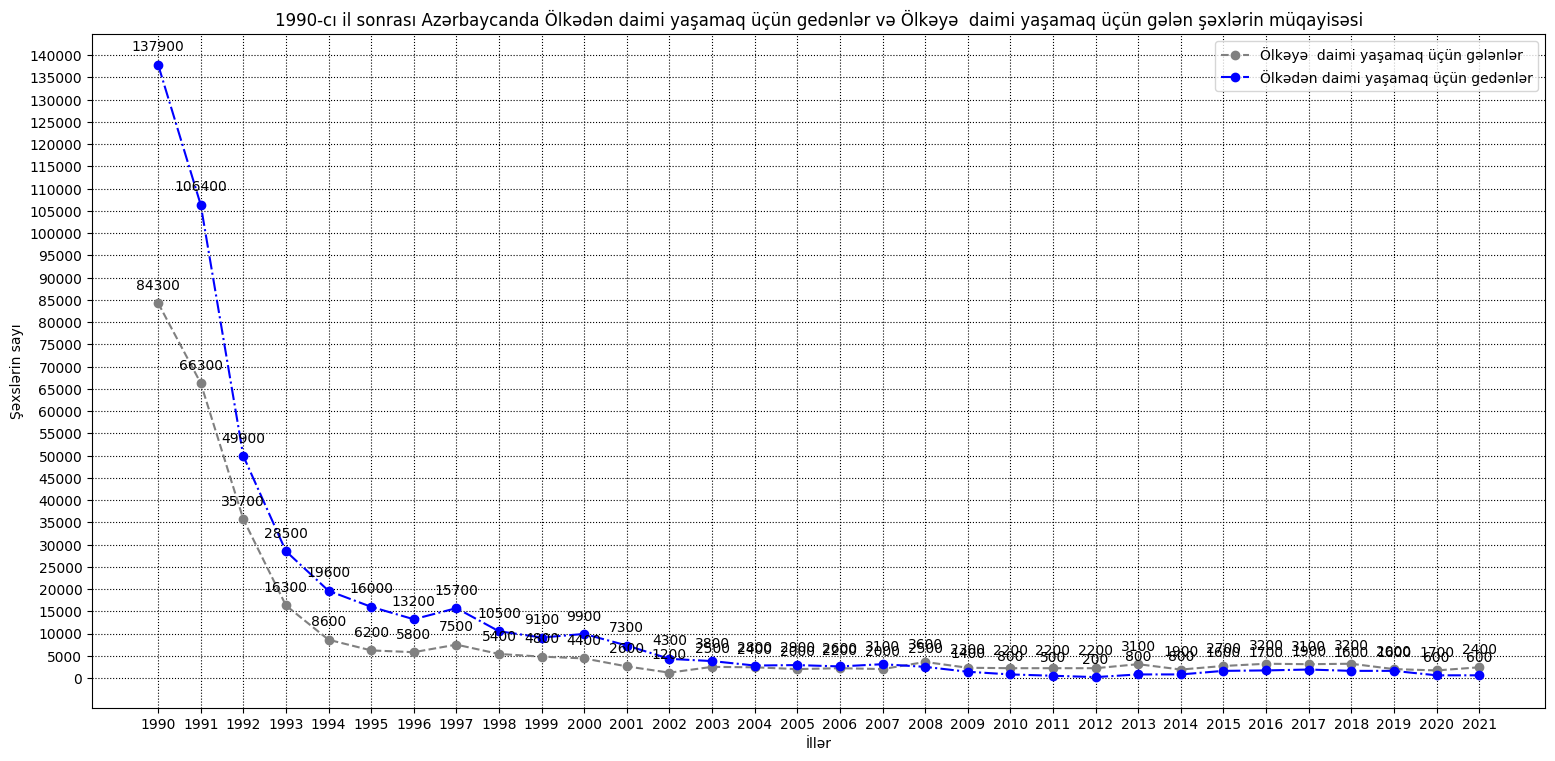

In [55]:
from pandas.core.frame import fmt
plt.figure(figsize=pti(1800,840))
plt.title(label='1990-cı il sonrası Azərbaycanda Ölkədən daimi yaşamaq üçün \
gedənlər və Ölkəyə  daimi yaşamaq üçün gələn şəxlərin müqayisəsi', loc='center')
plt.plot(df_BMiq_90dan_sonra.index, 'Ölkəyə  daimi yaşamaq üçün gələnlər', 
         color='grey',linestyle='--', marker='o',data=df_BMiq_90dan_sonra)
to_annotate(df_BMiq_90dan_sonra.index,df_BMiq_90dan_sonra['Ölkəyə  daimi \
yaşamaq üçün gələnlər'])
plt.plot(df_BMiq_90dan_sonra.index, 'Ölkədən daimi yaşamaq üçün gedənlər',
         '-.b',marker="o",data=df_BMiq_90dan_sonra)
to_annotate(df_BMiq_90dan_sonra.index,df_BMiq_90dan_sonra['Ölkədən daimi \
yaşamaq üçün gedənlər'])
plt.xlabel(xlabel='İllər', loc='center')
plt.ylabel(ylabel='Şəxslərin sayı', loc='center')
plt.xticks(range(1990,2022))
plt.yticks(range(0,145000,5000))
plt.legend(loc="upper right")
plt.grid(linestyle="dotted",alpha=1,color="black")
plt.show()


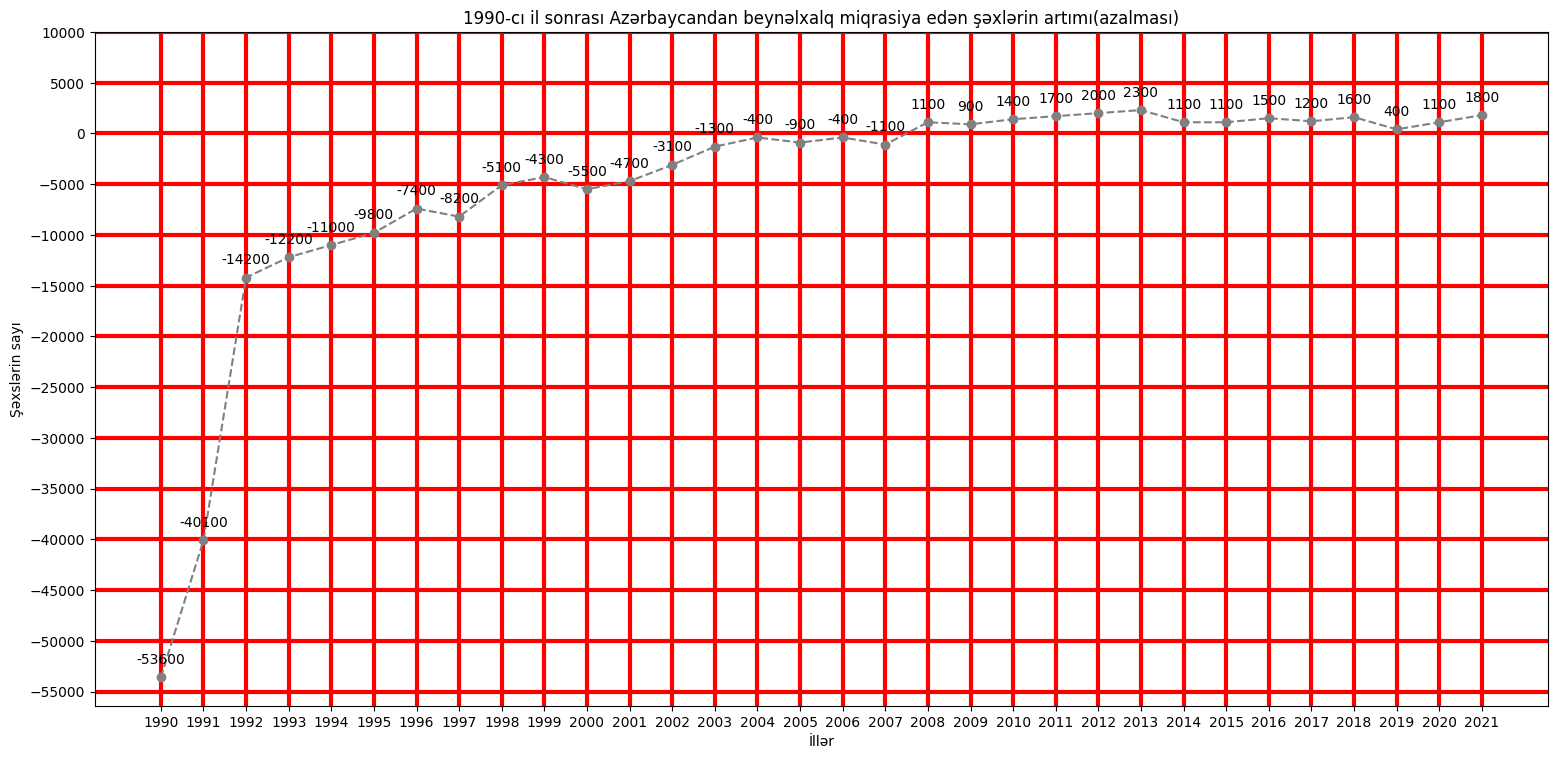

In [56]:
from pandas.core.frame import fmt
plt.figure(figsize=pti(1800,840))
plt.title(label='1990-cı il sonrası Azərbaycandan beynəlxalq\
 miqrasiya edən şəxlərin artımı(azalması)', loc='center')
plt.plot(df_BMiq_90dan_sonra.index, 'Miqrasiya artımı (azalması)', 
         color='grey',linestyle='--', marker='o',data=df_BMiq_90dan_sonra)
to_annotate(df_BMiq_90dan_sonra\
            .index,df_BMiq_90dan_sonra['Miqrasiya artımı (azalması)'])
plt.xlabel(xlabel='İllər', loc='center')
plt.ylabel(ylabel='Şəxslərin sayı', loc='center')
plt.xticks(range(1990,2022))
plt.yticks(range(-55000,15000,5000))
#plt.legend()
plt.grid(linewidth=3,color="r")

plt.show()
